In [1]:
#%pip install plotly

## LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import missingno as msno

In [3]:
HousePrice = pd.read_csv("train.csv")
df = HousePrice.copy()
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape
# 1460 row 81 col

(1460, 81)

In [5]:
df.dtypes.value_counts()
# 43 categorical 38 numerical

object     43
int64      35
float64     3
Name: count, dtype: int64

In [6]:
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: >

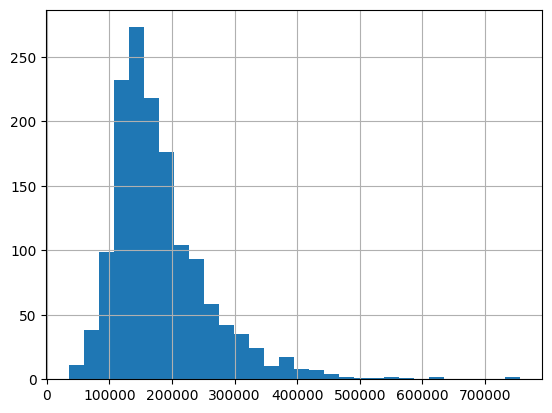

In [7]:
df.SalePrice.hist(bins=30)

<Axes: xlabel='SalePrice', ylabel='Count'>

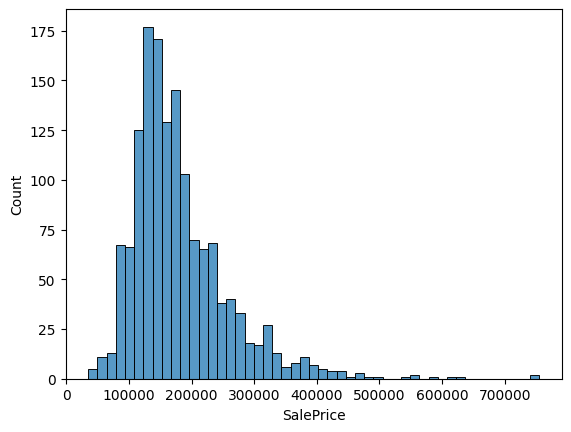

In [8]:
sns.histplot(x=df["SalePrice"])

In [9]:
null_counts = df.isnull().sum()
null_counts = null_counts[null_counts > 0]

null_contains_col = pd.DataFrame(
    {
        "column": null_counts.index,
        "null_count": null_counts.values
    }
)

null_contains_col

,column,null_count
0,LotFrontage,259
1,Alley,1369
2,MasVnrType,872
3,MasVnrArea,8
4,BsmtQual,37
5,BsmtCond,37
6,BsmtExposure,38
7,BsmtFinType1,37
8,BsmtFinType2,38
9,Electrical,1


In [10]:
null_contains_col["null_percentage"] = (null_contains_col["null_count"] / df.shape[0]) * 100
null_contains_col.head()

,column,null_count,null_percentage
0,LotFrontage,259,17.739726
1,Alley,1369,93.767123
2,MasVnrType,872,59.726027
3,MasVnrArea,8,0.547945
4,BsmtQual,37,2.534247


In [11]:
null_contains_col.sort_values(by="null_count", ascending=False).head(5).reset_index().iloc[:, 1:]

,column,null_count,null_percentage
0,PoolQC,1453,99.520548
1,MiscFeature,1406,96.301370
2,Alley,1369,93.767123
3,Fence,1179,80.753425
4,MasVnrType,872,59.726027


In [12]:
df.SalePrice.corr(df["GrLivArea"])

0.7086244776126522

<Axes: xlabel='SalePrice', ylabel='GrLivArea'>

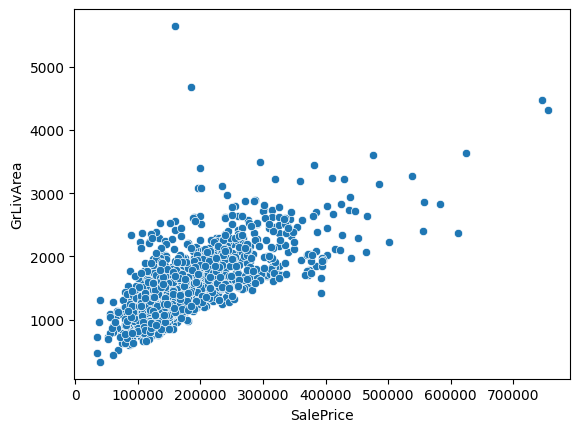

In [13]:
sns.scatterplot(data=df, x=df["SalePrice"], y=df["GrLivArea"])

In [14]:
df["Neighborhood"].nunique()

25

In [15]:
df["Neighborhood"].value_counts()

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64

In [16]:
df.groupby(df["OverallQual"])["SalePrice"].mean().sort_values(ascending=False)

OverallQual
10    438588.388889
9     367513.023256
8     274735.535714
7     207716.423197
6     161603.034759
5     133523.347607
4     108420.655172
3      87473.750000
2      51770.333333
1      50150.000000
Name: SalePrice, dtype: float64

In [17]:
df["HouseAge"] = (df["YrSold"] - df["YearBuilt"])
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HouseAge
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,5
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,31
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,7
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,91
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,8


In [18]:
df[df["SalePrice"] == 
   df["SalePrice"].max()][["Id", "SalePrice", "Neighborhood", "GrLivArea", "OverallQual"]]

,Id,SalePrice,Neighborhood,GrLivArea,OverallQual
691,692,755000,NoRidge,4316,10


In [19]:
df[df["TotalBsmtSF"] == 0].shape[0]

37

In [20]:
df["PriceLevel"] = df["SalePrice"].apply(
    lambda x: "Low" if x < 150000 else ("Medium" if x < 250000 else "high")
)

In [21]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HouseAge,PriceLevel
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,2,2008,WD,Normal,208500,5,Medium
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,5,2007,WD,Normal,181500,31,Medium
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,9,2008,WD,Normal,223500,7,Medium
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,2,2006,WD,Abnorml,140000,91,Low
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,12,2008,WD,Normal,250000,8,high


In [22]:
df.groupby("BldgType")["HouseAge"].mean()

BldgType
1Fam      38.143443
2fmCon    78.677419
Duplex    40.634615
Twnhs     21.558140
TwnhsE    11.807018
Name: HouseAge, dtype: float64

In [23]:
df["Exterior1st"].value_counts().idxmax() # .index[0]

'VinylSd'

In [24]:
df["LotArea"].agg(["min","max","mean"])

min       1300.000000
max     215245.000000
mean     10516.828082
Name: LotArea, dtype: float64

In [25]:
grg = df[df["GarageArea"].notna() & (df["GarageCars"] > 2)]
grg["SalePrice"].mean()

306491.48924731184

In [26]:
df[df["2ndFlrSF"] > 0].shape[0] # (df["2ndFlrSF"] > 0).sum()

631

In [27]:
corr_SalePrice = []

for col in df.select_dtypes(include="number").columns:
    corr_value = df["SalePrice"].corr(df[col])
    corr_SalePrice.append({"column": col, "corr_with_SalePrice": corr_value})


corr_df = pd.DataFrame(corr_SalePrice)

corr_btw_SalePrice = pd.DataFrame(corr_df, columns=["column","corr_with_SalePrice"])
corr_btw_SalePrice.sort_values(by="corr_with_SalePrice", ascending=False)[1:6].reset_index(drop=True)

,column,corr_with_SalePrice
0,OverallQual,0.790982
1,GrLivArea,0.708624
2,GarageCars,0.640409
3,GarageArea,0.623431
4,TotalBsmtSF,0.613581


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14488\1266708248.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df["Neighborhood"].unique(), x=df.groupby("Neighborhood")["SalePrice"].mean(), palette="tab10")


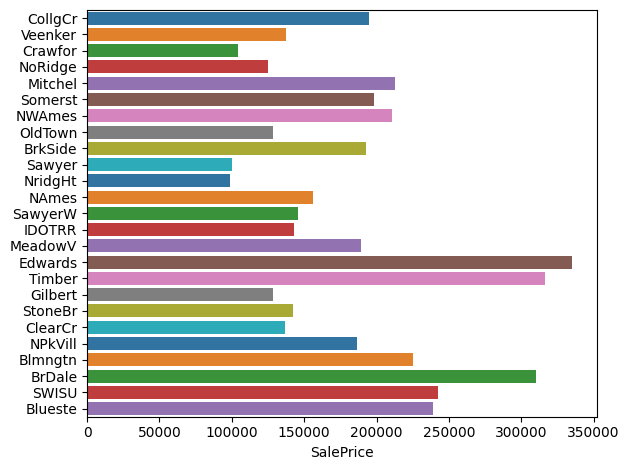

In [28]:
sns.barplot(y=df["Neighborhood"].unique(), x=df.groupby("Neighborhood")["SalePrice"].mean(), palette="tab10")
plt.tight_layout()
plt.show()

In [29]:
null_counts = df.isnull().sum()
null_counts = null_counts[null_counts > 0]

null_contains_col = pd.DataFrame(
    {
        "column": null_counts.index,
        "null_count": null_counts.values
    }
)

ten_percentage_null = null_contains_col[null_contains_col["null_count"] > (df.shape[0] / 10)]
ten_percentage_null = ten_percentage_null.sort_values(
    by="null_count",
    ascending=False
    ).reset_index(drop=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14488\3692801928.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ten_percentage_null, x="null_count", y="column", palette="tab10")


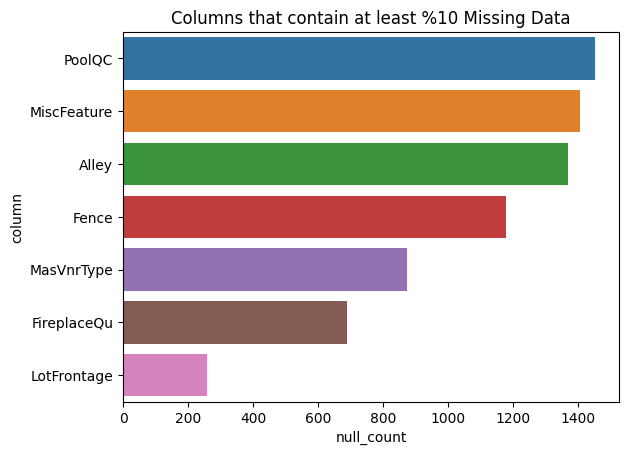

In [30]:
sns.barplot(data=ten_percentage_null, x="null_count", y="column", palette="tab10")
plt.title("Columns that contain at least %10 Missing Data")
plt.show()

In [31]:
most_expensive_ngbrhood = df.groupby("Neighborhood")["SalePrice"].max()

ngbrhood_table = []
i = 0
for max in most_expensive_ngbrhood:
    ngbrhood_table.append({"ngbrhood_name": most_expensive_ngbrhood.index[i],
                           "Max_Price": max})
    i += 1

df_table = pd.DataFrame(ngbrhood_table)

df_table

,ngbrhood_name,Max_Price
0,Blmngtn,264561
1,Blueste,151000
2,BrDale,125000
3,BrkSide,223500
4,ClearCr,328000
5,CollgCr,424870
6,Crawfor,392500
7,Edwards,320000
8,Gilbert,377500
9,IDOTRR,169500


In [32]:
max_idx = df.groupby("Neighborhood")["SalePrice"].idxmax()

result = df.loc[max_idx, ["Neighborhood", "Id", "SalePrice", "GrLivArea"]]

result = result.sort_values(by="SalePrice", ascending=False).reset_index(drop=True)

result

,Neighborhood,Id,SalePrice,GrLivArea
0,NoRidge,692,755000,4316
1,NridgHt,899,611657,2364
2,StoneBr,1047,556581,2868
3,OldTown,186,475000,3608
4,CollgCr,1143,424870,2828
5,Somerst,665,423000,2097
6,Crawfor,1182,392500,1652
7,Veenker,54,385000,1842
8,Timber,1268,378500,2018
9,Gilbert,1389,377500,1746


In [33]:
df[(df["1stFlrSF"] + df["2ndFlrSF"] + df["3SsnPorch"]) > 3000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HouseAge,PriceLevel
118,119,60,RL,90.0,12376,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,5,2010,WD,Normal,320000,20,high
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,GdPrv,NaN,0,6,2006,WD,Normal,475000,114,high
304,305,75,RM,87.0,18386,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,5,2008,WD,Normal,295000,128,high
496,497,20,RL,NaN,12692,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,5,2007,WD,Normal,430000,15,high
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,NaN,NaN,0,10,2007,New,Partial,184750,0,Medium
608,609,70,RL,78.0,12168,Pave,NaN,Reg,HLS,AllPub,...,NaN,NaN,0,9,2007,WD,Alloca,359100,73,high
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,1,2007,WD,Normal,755000,13,high
769,770,60,RL,47.0,53504,Pave,NaN,IR2,HLS,AllPub,...,NaN,NaN,0,6,2010,WD,Normal,538000,7,high
798,799,60,RL,104.0,13518,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,7,2009,New,Partial,485000,1,high
1169,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,7,2006,WD,Normal,625000,11,high


In [34]:
def is_third_floor(row):
    total = row["1stFlrSF"] + row["2ndFlrSF"] + row["3SsnPorch"]
    return total > 3000

filtered_df = df[df.apply(is_third_floor, axis = 1)]
filtered_df.reset_index(drop=True)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HouseAge,PriceLevel
0,119,60,RL,90.0,12376,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,5,2010,WD,Normal,320000,20,high
1,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,GdPrv,NaN,0,6,2006,WD,Normal,475000,114,high
2,305,75,RM,87.0,18386,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,5,2008,WD,Normal,295000,128,high
3,497,20,RL,NaN,12692,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,5,2007,WD,Normal,430000,15,high
4,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,NaN,NaN,0,10,2007,New,Partial,184750,0,Medium
5,609,70,RL,78.0,12168,Pave,NaN,Reg,HLS,AllPub,...,NaN,NaN,0,9,2007,WD,Alloca,359100,73,high
6,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,1,2007,WD,Normal,755000,13,high
7,770,60,RL,47.0,53504,Pave,NaN,IR2,HLS,AllPub,...,NaN,NaN,0,6,2010,WD,Normal,538000,7,high
8,799,60,RL,104.0,13518,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,7,2009,New,Partial,485000,1,high
9,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,7,2006,WD,Normal,625000,11,high


In [35]:
df["TotalSF"] = (df["TotalBsmtSF"] + df["1stFlrSF"] + df["2ndFlrSF"])
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HouseAge,PriceLevel,TotalSF
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,2,2008,WD,Normal,208500,5,Medium,2566
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,5,2007,WD,Normal,181500,31,Medium,2524
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,9,2008,WD,Normal,223500,7,Medium,2706
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,2,2006,WD,Abnorml,140000,91,Low,2473
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,12,2008,WD,Normal,250000,8,high,3343


In [36]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HouseAge,PriceLevel,TotalSF
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,2,2008,WD,Normal,208500,5,Medium,2566
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,5,2007,WD,Normal,181500,31,Medium,2524
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,9,2008,WD,Normal,223500,7,Medium,2706
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,2,2006,WD,Abnorml,140000,91,Low,2473
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,12,2008,WD,Normal,250000,8,high,3343


In [37]:
df["floor_count"] = df["2ndFlrSF"].apply(lambda x: 2 if x > 0 else 1)

df.groupby("floor_count")["SalePrice"].mean()

floor_count
1    171383.670688
2    193451.478605
Name: SalePrice, dtype: float64

In [38]:
def conditionClass(row):
    if row < 4:
        return "Bad"
    elif row < 7 and row > 3:
        return "Mid"
    else:
        return "Good"
    

df["ConditionClass"] = df["OverallCond"].apply(conditionClass)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HouseAge,PriceLevel,TotalSF,floor_count,ConditionClass
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,2,2008,WD,Normal,208500,5,Medium,2566,2,Mid
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,5,2007,WD,Normal,181500,31,Medium,2524,1,Good
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,9,2008,WD,Normal,223500,7,Medium,2706,2,Mid
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,2,2006,WD,Abnorml,140000,91,Low,2473,2,Mid
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,12,2008,WD,Normal,250000,8,high,3343,2,Mid


In [39]:
df[df["GrLivArea"] > 4500][["Id", "SalePrice", "GrLivArea"]]

,Id,SalePrice,GrLivArea
523,524,184750,4676
1298,1299,160000,5642


In [40]:
corr_SalePrice = []

for col in df.select_dtypes(include="number").columns:
    corr_value = df["SalePrice"].corr(df[col])
    corr_SalePrice.append({"column": col, "corr_with_SalePrice": corr_value})

for_heatmap = pd.DataFrame(corr_SalePrice).sort_values(
    by="corr_with_SalePrice", ascending=False
    ).reset_index(drop=True)[1:11]

for_heatmap

,column,corr_with_SalePrice
1,OverallQual,0.790982
2,TotalSF,0.782260
3,GrLivArea,0.708624
4,GarageCars,0.640409
5,GarageArea,0.623431
6,TotalBsmtSF,0.613581
7,1stFlrSF,0.605852
8,FullBath,0.560664
9,TotRmsAbvGrd,0.533723
10,YearBuilt,0.522897


<Axes: >

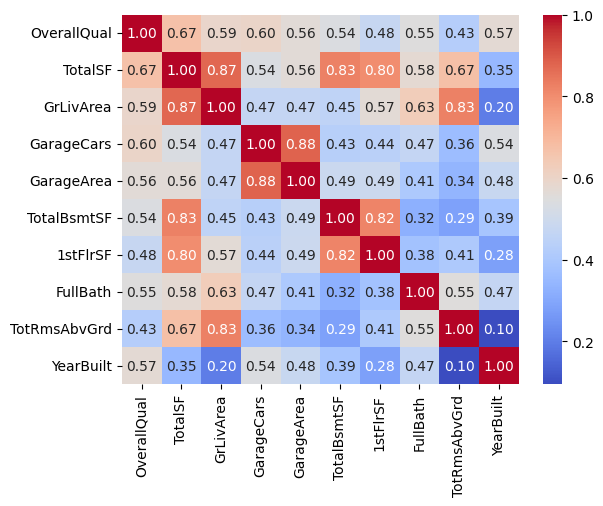

In [41]:
sns.heatmap(data=df[for_heatmap["column"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")

In [42]:
def first_floor_categorical(row):
    if row < 1000:
        return "Small"
    elif row <= 1500 and row >= 1000:
        return "Middle"
    else:
        return "Big"
    
df["FirstFloorClass"] = df["1stFlrSF"].apply(first_floor_categorical)

df.groupby("FirstFloorClass")["SalePrice"].mean()

FirstFloorClass
Big       264653.776557
Middle    181775.840796
Small     140896.631849
Name: SalePrice, dtype: float64

In [43]:
df["HouseAgeGroup"] = df["HouseAge"].apply(
    lambda x: "Yeni" if x <= 10 else ("Orta Yaşlı" if x <= 50 else "Eski")
)
df["HouseAgeGroup"].value_counts()

HouseAgeGroup
Orta Yaşlı    587
Eski          439
Yeni          434
Name: count, dtype: int64

In [44]:
#df.groupby((df["GarageCars"] == 3) & (df["OverallQual"] >= 8))["SalePrice"].mean()

df[(df["GarageCars"] == 3) & (df["OverallQual"] >= 8)]["SalePrice"].mean()

343914.7328244275

In [45]:
low_freq = df["Exterior1st"].value_counts()
low_freq = low_freq[low_freq < 10].index
low_freq

Index(['BrkComm', 'Stone', 'AsphShn', 'ImStucc', 'CBlock'], dtype='object', name='Exterior1st')

In [46]:
df[df["Exterior1st"].isin(low_freq)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,SaleType,SaleCondition,SalePrice,HouseAge,PriceLevel,TotalSF,floor_count,ConditionClass,FirstFloorClass,HouseAgeGroup
410,411,20,RL,68.0,9571,Pave,NaN,Reg,Lvl,AllPub,...,COD,Abnorml,60000,51,Low,2552,1,Bad,Middle,Eski
1000,1001,20,RL,74.0,10206,Pave,NaN,Reg,Lvl,AllPub,...,WD,Normal,82000,57,Low,944,1,Bad,Small,Eski
1011,1012,90,RL,75.0,9825,Pave,NaN,Reg,Lvl,AllPub,...,WD,Normal,100000,45,Low,1664,1,Mid,Big,Orta Yaşlı
1024,1025,20,RL,NaN,15498,Pave,NaN,IR1,Lvl,AllPub,...,COD,Abnorml,287000,32,high,4463,1,Mid,Big,Orta Yaşlı
1152,1153,20,RL,90.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,WD,Abnorml,230000,50,Medium,2884,1,Good,Big,Orta Yaşlı
1187,1188,20,RL,89.0,12461,Pave,NaN,Reg,Lvl,AllPub,...,WD,Normal,262000,12,high,3248,1,Mid,Big,Orta Yaşlı
1370,1371,50,RL,90.0,5400,Pave,NaN,Reg,Lvl,AllPub,...,WD,Normal,105000,89,Low,2214,2,Mid,Small,Eski


In [47]:
high_level = df[df["PriceLevel"] == "high"]

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

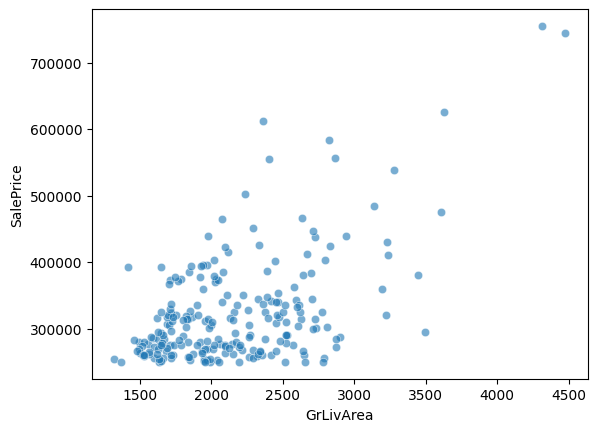

In [48]:
sns.scatterplot(data=high_level ,x="GrLivArea", y="SalePrice", alpha=0.6)

In [49]:
SP_corr = df.corr(numeric_only=True)["SalePrice"].sort_values(ascending=False)

SP_corr = SP_corr[SP_corr > 0.5]
SP_corr = SP_corr.iloc[1:]
corr_SalePrice_fifty = pd.DataFrame(SP_corr)
corr_SalePrice_fifty["column_name"] = corr_SalePrice_fifty.index
corr_SalePrice_fifty

,SalePrice,column_name
OverallQual,0.790982,OverallQual
TotalSF,0.782260,TotalSF
GrLivArea,0.708624,GrLivArea
GarageCars,0.640409,GarageCars
GarageArea,0.623431,GarageArea
TotalBsmtSF,0.613581,TotalBsmtSF
1stFlrSF,0.605852,1stFlrSF
FullBath,0.560664,FullBath
TotRmsAbvGrd,0.533723,TotRmsAbvGrd
YearBuilt,0.522897,YearBuilt


In [50]:
df.drop(df[df["GrLivArea"] > 4500].index, inplace=True)

In [51]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,SaleType,SaleCondition,SalePrice,HouseAge,PriceLevel,TotalSF,floor_count,ConditionClass,FirstFloorClass,HouseAgeGroup
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,WD,Normal,208500,5,Medium,2566,2,Mid,Small,Yeni
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,WD,Normal,181500,31,Medium,2524,1,Good,Middle,Orta Yaşlı
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,WD,Normal,223500,7,Medium,2706,2,Mid,Small,Yeni
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,WD,Abnorml,140000,91,Low,2473,2,Mid,Small,Eski
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,WD,Normal,250000,8,high,3343,2,Mid,Middle,Yeni
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,WD,Normal,175000,8,Medium,2600,2,Mid,Small,Yeni
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,WD,Normal,210000,32,Medium,3615,1,Mid,Big,Orta Yaşlı
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,WD,Normal,266500,69,high,3492,2,Good,Middle,Eski
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,WD,Normal,142125,60,Low,2156,1,Mid,Middle,Eski


In [52]:
neighborhood_dummies = pd.get_dummies(df["Neighborhood"], prefix="Neighborhood")

In [53]:
neighborhood_dummies.iloc[:5]

,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [54]:
from sklearn.preprocessing import StandardScaler

scale_list = ["GrLivArea", "TotalBsmtSF", "1stFlrSF", "GarageArea"]

df_scaled = StandardScaler().fit_transform(df[scale_list])
df_scaled


array([[ 0.3930128 , -0.4737659 , -0.81430891,  0.35797333],
       [-0.48939058,  0.50492472,  0.2773475 , -0.05679535],
       [ 0.54270624, -0.31948954, -0.64222514,  0.64077016],
       ...,
       [ 1.63389256,  0.23976224,  0.07837564, -1.0371577 ],
       [-0.85180626,  0.0613802 , -0.21739333, -1.09371707],
       [-0.50120848,  0.49046131,  0.26121465, -0.92403897]])

In [55]:
from sklearn.model_selection import train_test_split

X = df.drop("SalePrice", axis=1).select_dtypes(["float", "int"])
y = df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1166, 40)
(292, 40)
(1166,)
(292,)


In [56]:
import statsmodels.api as sm

X_lm = df[["GrLivArea"]]

X_lm = sm.add_constant(X_lm)
X_lm[:5]


,const,GrLivArea
0,1.0,1710
1,1.0,1262
2,1.0,1786
3,1.0,1717
4,1.0,2198


In [57]:
y = df[["SalePrice"]]

y[:5]

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


In [58]:
linear_model = sm.OLS(y, X_lm).fit()

linear_model.summary() # R2 : 0.54

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     1710.
Date:                Fri, 20 Jun 2025   Prob (F-statistic):          6.59e-248
Time:                        17:14:24   Log-Likelihood:                -17953.
No. Observations:                1458   AIC:                         3.591e+04
Df Residuals:                    1456   BIC:                         3.592e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7168.9699   4432.501      1.617      0.106   -1525.800    1.59e+04
GrLivArea    115.0400      2.782     41.358      0.000     109.584     120.496
==============================================================================
Omnibus:                      261.592   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1096.093
Skew:                           0.801   Prob(JB):                    9.69e-239
Kurtosis:                       6.934   Cond. No.                     5.00e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
from sklearn.linear_model import LinearRegression

X_Mlr = df[["GrLivArea", "TotalBsmtSF", "1stFlrSF", "GarageArea"]]
y = df["SalePrice"]

X_train_mlr, X_test_mlr, y_train_mlr, y_test_mlr = train_test_split(
    X_Mlr, y, test_size=0.2, random_state=42)

mlr_model = LinearRegression().fit(X=X_train_mlr, y=y_train_mlr)

r2_score_mlr = mlr_model.score(X_test_mlr, y_test_mlr)

r2_score_mlr

0.7019723285975314

In [60]:
y_pred_mlr = mlr_model.predict(X_test_mlr)

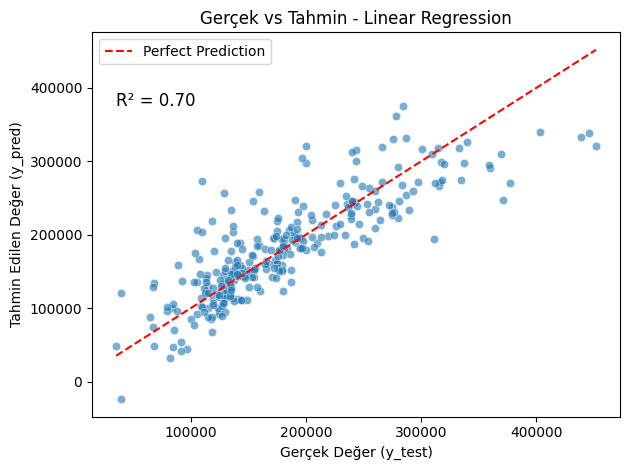

In [61]:
sns.scatterplot(x=y_test_mlr, y=y_pred_mlr, alpha=0.6)

plt.plot([y_test_mlr.min(), y_test_mlr.max()],
         [y_test_mlr.min(), y_test_mlr.max()],
         color='red', linestyle='--', label='Perfect Prediction')

plt.text(x=y_test_mlr.min(), y=y_pred_mlr.max(), s=f"R² = {r2_score_mlr:.2f}", fontsize=12)

plt.xlabel("Gerçek Değer (y_test)")
plt.ylabel("Tahmin Edilen Değer (y_pred)")
plt.title("Gerçek vs Tahmin - Linear Regression")
plt.legend()
plt.tight_layout()
plt.show()

In [62]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error

print("MSE: ", mean_squared_error(y_pred=y_pred_mlr, y_true=y_test_mlr))
print("MAE: ", mean_absolute_error(y_pred=y_pred_mlr, y_true=y_test_mlr))
print("RMSE: ", root_mean_squared_error(y_pred=y_pred_mlr, y_true=y_test_mlr))
#MSE:  1646223602.0896623
#MAE:  29152.92469325261
#RMSE:  40573.68115034255

MSE:  1646223602.0896623
MAE:  29152.92469325261
RMSE:  40573.68115034255


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
X = df.drop("SalePrice", axis=1).select_dtypes(["float", "int"])
y = df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1166, 40)
(292, 40)
(1166,)
(292,)


In [64]:
RF_model = RandomForestRegressor().fit(X_train, y_train)
y_pred_RF = RF_model.predict(X_test)

RF_model.feature_importances_

array([6.77357136e-03, 1.88628279e-03, 6.59318245e-03, 1.09494526e-02,
       4.17184007e-01, 6.76291947e-03, 9.60378667e-03, 1.14272450e-02,
       4.10029209e-03, 1.91248431e-02, 5.94699898e-04, 9.89916667e-03,
       4.73889270e-03, 5.66087517e-03, 9.37845473e-03, 3.49243034e-05,
       1.62832092e-02, 1.03463240e-03, 4.46697519e-04, 1.20598384e-03,
       4.53254532e-04, 9.70182925e-04, 1.44619414e-03, 8.55992416e-03,
       3.19471290e-03, 5.99662062e-03, 7.59613452e-03, 9.35777002e-03,
       5.51796246e-03, 3.91643515e-03, 6.78694284e-04, 9.30251288e-05,
       8.34787969e-04, 6.54160073e-05, 8.21454808e-05, 3.35560209e-03,
       1.50242604e-03, 9.91294982e-03, 3.92662948e-01, 1.19694671e-04])

In [65]:
importance = pd.DataFrame({'Importance': RF_model.feature_importances_*100},
                           index=X_train.columns)
importance.sort_values(by='Importance', ascending=False,
                       axis = 0)[:10]

,Importance
OverallQual,41.718401
TotalSF,39.266295
BsmtFinSF1,1.912484
GrLivArea,1.628321
YearRemodAdd,1.142725
LotArea,1.094945
HouseAge,0.991295
BsmtUnfSF,0.989917
YearBuilt,0.960379
2ndFlrSF,0.937845


In [66]:
RF_model.score(X=X_test, y=y_test)

0.9060182609722054